In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [149]:
# Model dimensional parameters
dt = 1 # set the ts step
Tmax = 400 # set the maximum ts
ts_seq = np.arange(0, Tmax+dt, dt) # sequence of ts values
depth = 10000 # n iterations of APD per ts value

# Experimental constants
A = 270
B1 = 2441
B2 = 90.02
T1 = 19.6
T2 = 200.5

DImin = 53.5
n = 1

x = np.zeros((len(ts_seq), depth+1), dtype=np.float64) #preallocate the solution array. first row is the ts values, and the columns below it are all the solutions for that ts.
x[:,0] = ts_seq # first row of values is ts
x[:,1] = 200 # second row of values is initial conditions, [0, 270]


def eqn1(x_i, ts, A, B1, B2, T1, T2):
    result = A - B1*np.exp((x_i-n*ts)/T1) - B2*np.exp((x_i-n*ts)/T2)
    if result < DImin:
        result = DImin
    return(result)

for ts in np.arange(len(x[:,0])):
    for i in np.arange(0, len(x[ts,:])-1):
        x[ts,i+1] = eqn1(x[ts,i], ts, A, B1, B2, T1, T2)

solution_df = pd.DataFrame(data = x)
solution_df.rename(columns = {0:'ts'}, inplace = True)

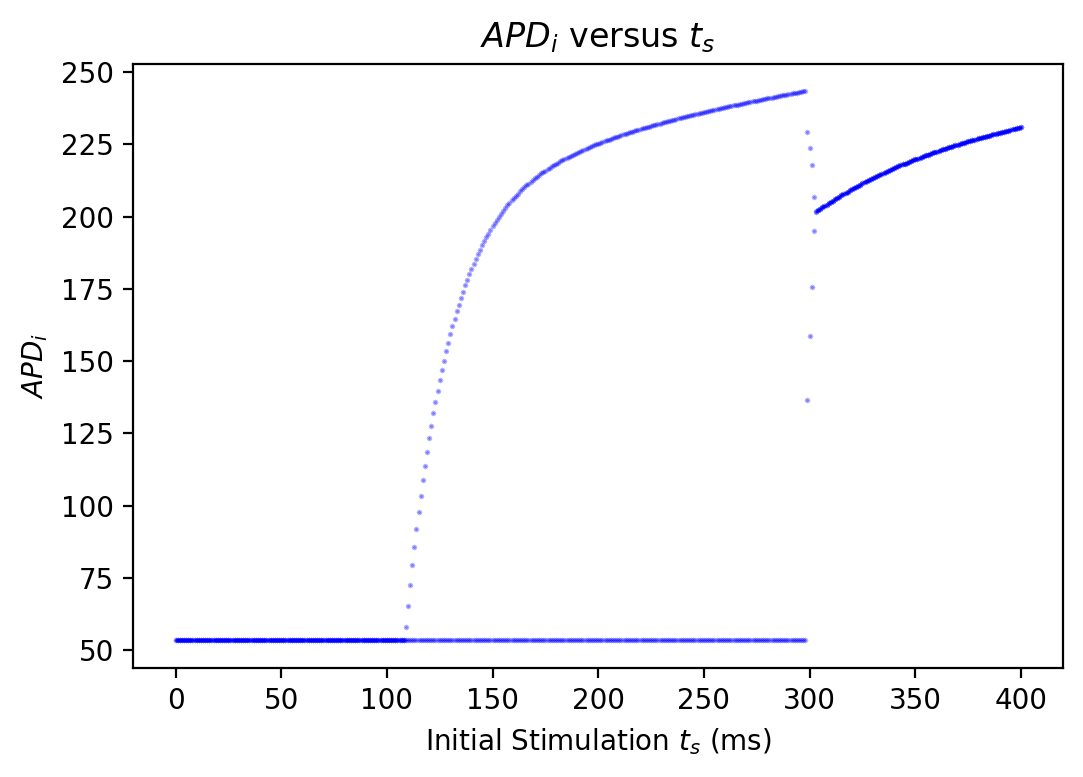

In [156]:
lastn = 50
plt.figure(dpi=200)
for col in np.arange(solution_df.shape[0]-lastn, solution_df.shape[0]):
    plt.scatter(solution_df["ts"], solution_df[col], c = 'b', alpha = 0.01, s=1)
plt.title("$APD_i$ versus $t_s$")
plt.xlabel("Initial Stimulation $t_s$ (ms)")
plt.ylabel("$APD_i$")
plt.show()